In [1]:
#alle nodige imports
import matplotlib.pyplot as plt
import sounddevice as sd
import numpy as np
from mijngeluid import fft_partitioned

sd.query_devices()#geeft de beschikbaren devices weer

   0 Microsoft-geluidstoewijzing - Input, MME (2 in, 0 out)
>  1 Microphone Array (Intel® Smart , MME (4 in, 0 out)
   2 Microsoft-geluidstoewijzing - Output, MME (0 in, 2 out)
<  3 Speakers (Realtek(R) Audio), MME (0 in, 2 out)
   4 Hoofdtelefoon (), Windows WDM-KS (0 in, 2 out)
   5 Headphones (Realtek HD Audio 2nd output), Windows WDM-KS (0 in, 2 out)
   6 Microfoon 1 (Realtek HD Audio Mic input with SST), Windows WDM-KS (2 in, 0 out)
   7 Microfoon 2 (Realtek HD Audio Mic input with SST), Windows WDM-KS (4 in, 0 out)
   8 Speakers 1 (Realtek HD Audio output with SST), Windows WDM-KS (0 in, 2 out)
   9 Speakers 2 (Realtek HD Audio output with SST), Windows WDM-KS (0 in, 2 out)
  10 Pc-luidspreker (Realtek HD Audio output with SST), Windows WDM-KS (2 in, 0 out)
  11 Stereo-mix (Realtek HD Audio Stereo input), Windows WDM-KS (2 in, 0 out)
  12 Hoofdtelefoon (), Windows WDM-KS (0 in, 2 out)
  13 Luidsprekers (), Windows WDM-KS (0 in, 2 out)
  14 Microfoonmatrix 1 (Intel® Smart Sound Te

In [9]:
fs = 44100 #aantal meetpunten per seconde
duration = 6 #tijd van de meting
arr = sd.rec(int((duration * fs)), samplerate=fs, channels=2, dtype='float32', device=1) #opnemen geluid

sd.wait()#om er zeker van te zijn dat de opname klaar is
arr.shape#geeft de grote van de opname weer

(264600, 2)

In [3]:
myrecording = sd.play(arr)#afspelen van de opname

In [4]:
df = fft_partitioned(arr[:,0], fs, duration, t_bin=1e-2) # t_bin is de bin grootte in seconden. fast fourier transformatie
df#print de fast fourier transformatie uitkomst

,t,x,y
0,0.01,0.000000,4.152051e-07
1,0.01,100.684932,1.104058e-06
2,0.01,201.369863,3.315286e-07
3,0.01,302.054795,7.400583e-07
4,0.01,402.739726,1.787577e-06
...,...,...,...
215,6.00,21647.260274,2.285477e-05
216,6.00,21747.945205,1.018021e-05
217,6.00,21848.630137,1.024410e-05
218,6.00,21949.315068,6.635191e-06


Text(0, 0.5, 'dB ')

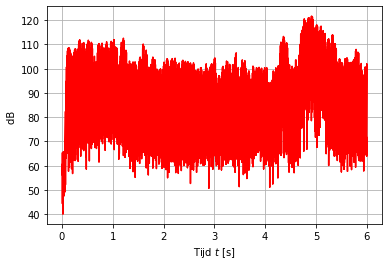

In [12]:
plt.plot(df.t, 10 * np.log10(df.y/10**-12), 'r-')#plot met dB en tijd
plt.grid()#grid lines maken in de plot
plt.xlabel(r"Tijd $t$ [s]")#xlabel maken
plt.ylabel(r"dB ")#ylabel maken
plt.xlim(0, 12)#inzoomen op de xas
plt.ylim(80, 115)#inzoomen op de yas